In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import cv2

In [5]:
cat4=cv2.imread("../CATS_DOGS/train/CAT/4.jpg")

In [6]:
cat4=cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

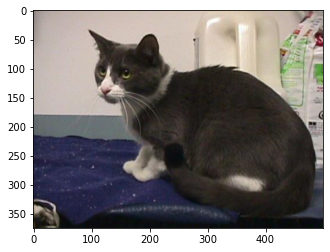

In [7]:
plt.imshow(cat4)

In [8]:
cat4.shape

(375, 500, 3)

In [9]:
dog2=cv2.imread("../CATS_DOGS/train/DOG/2.jpg")

In [10]:
dog2=cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)

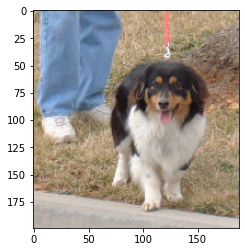

In [11]:
plt.imshow(dog2)

In [12]:
dog2.shape

(199, 188, 3)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [14]:
image_gen=ImageDataGenerator(rotation_range=30, width_shift_range=0.10,
                            height_shift_range=0.10,
                            rescale=1/255, 
                            shear_range=0.20, zoom_range=0.20, horizontal_flip=True,
                            fill_mode="nearest")

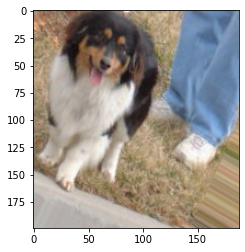

In [19]:
plt.imshow(image_gen.random_transform(dog2))

In [20]:
image_gen.flow_from_directory("../CATS_DOGS/train")
#2 classes because there are 2 folders in the train folder

Found 18743 images belonging to 2 classes.


In [21]:
input_shape=(150, 150, 3)

#stretch out images that are smaller than input_shape and
#shrink images that are larger than input_shape

In [22]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [23]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))

model.add(Activation("relu"))

model.add(Dropout(0.5))
#helps reduce overfitting by randomly turning off neurons during the training
#here, 50%

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam", 
             metrics=["accuracy"])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

In [25]:
batch_size=16

train_image_gen=image_gen.flow_from_directory("../CATS_DOGS/train", target_size=input_shape[:2],
                                             batch_size=batch_size, class_mode="binary")


Found 18743 images belonging to 2 classes.


In [26]:
batch_size=16

test_image_gen=image_gen.flow_from_directory("../CATS_DOGS/test", target_size=input_shape[:2],
                                            batch_size=batch_size, class_mode="binary")

Found 6251 images belonging to 2 classes.


In [27]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [28]:
results=model.fit_generator(train_image_gen, epochs=1, steps_per_epoch=150,
                           validation_data=test_image_gen, validation_steps=12)

Epoch 1/1
150/150 [==============================] - 39s 260ms/step - loss: 0.6971 - accuracy: 0.5211 - val_loss: 0.6738 - val_accuracy: 0.5990


In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
results.history["accuracy"]

[0.52112085]

In [33]:
from keras.models import load_model

In [34]:
new_model=load_model("cat_dog_100epochs.h5")

In [35]:
dog_file="../CATS_DOGS/test/DOG/10005.jpg"

In [37]:
from keras.preprocessing import image

In [38]:
dog_img=image.load_img(dog_file, target_size=(150, 150))

In [39]:
dog_img=image.img_to_array(dog_img)

In [40]:
dog_img.shape

(150, 150, 3)

In [41]:
import numpy as np

In [42]:
dog_img=np.expand_dims(dog_img, axis=0)

In [43]:
dog_img.shape

(1, 150, 150, 3)

In [44]:
dog_img/=255

In [45]:
model.predict_classes(dog_img)

array([[0]])

In [47]:
model.predict(dog_img)

array([[0.48485824]], dtype=float32)